# Basic Feature Discovering Titanic Dataset

## Problem and Data Understandi
    1. The data used is the most titanic dataset from Kaggle (https://www.kaggle.com/c/titanic/data).
    2. In this dataset have column Survived. In this case I am trying to find out whether the passenger survive or not.
    3. I also trying to visualize from this dataset.
    4. The data consists of:
        a. PassengerId
        b. Survived (0 = Not Survived and 1 = Survived)
        c. Pclass (Passenger class, 1 = Upper Class, 2 = Middle Class, and 3 = Lower Class)
        d. Name, Sex, and Age (self-explanatory data)
        e. SibSp (Number of siblings)
        f. Parch (Amount of parents and children)
        g. Ticket (Amout of ticket)
        h. Fare (Fares for the passenger)
        i. Cabin (No. cabin)
        j. Embarked (Port of departue, C = Cherbourg, Q = Queenstown, and S = Southampton

## Data Preparation
### Import Data and Inspection 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats



import string
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
def concat_df(train_data, test_data):
    #Returns a concated df of training_data and test_data
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

In [3]:
df_train = pd.read_csv('Data/titanic_train.csv')
df_test = pd.read_csv('Data/titanic_test.csv')
df_all = concat_df(df_train, df_test)

In [4]:
df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set'

In [5]:
dfs = [df_train, df_test]

shape of the data:

In [6]:
print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[1]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['Survived'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)

Number of Training Examples = 891
Number of Test Examples = 11

Training X Shape = (891, 12)
Training y Shape = 891

Test X Shape = (418, 11)
Test y Shape = 418

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Information from the data:

In [7]:
df_train.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)

In [8]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Correlation from each column

In [9]:
df_train_corr = df_train.corr().abs()
print(df_train_corr.to_string())

             PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000  0.005007  0.035144  0.036847  0.057527  0.001652  0.012658
Survived        0.005007  1.000000  0.338481  0.077221  0.035322  0.081629  0.257307
Pclass          0.035144  0.338481  1.000000  0.369226  0.083081  0.018443  0.549500
Age             0.036847  0.077221  0.369226  1.000000  0.308247  0.189119  0.096067
SibSp           0.057527  0.035322  0.083081  0.308247  1.000000  0.414838  0.159651
Parch           0.001652  0.081629  0.018443  0.189119  0.414838  1.000000  0.216225
Fare            0.012658  0.257307  0.549500  0.096067  0.159651  0.216225  1.000000


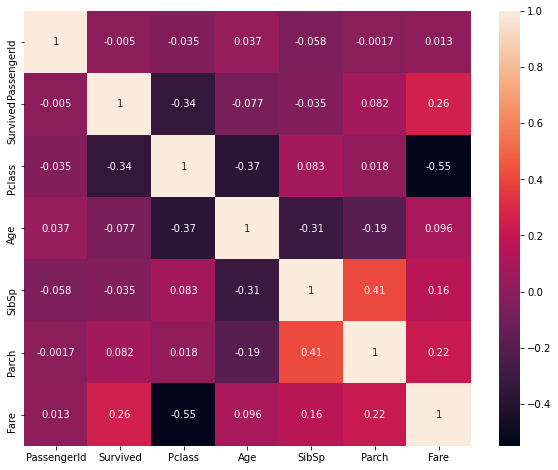

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(), annot=True)

From the correlation matrix can see that Survived have correlation with Parch and Fare. 
while Age correlated with Pclass, SibSp, and Parch.

Identify missing values from the dataset

In [11]:
def display_missing(df):
    for col in df.columns.tolist():
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    
for df in dfs:
    print ('{}:'.format(df.name))
    display_missing(df)

Training Set:
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


Test Set:
PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0




Column Age correlated with Pclass, so I decide to imputate that use Median from passeger in that Pclass based on the gender/sex.

In [12]:
age_by_pclass_sex = df_all.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in (df_train['Pclass'].value_counts().index.sort_values()):
    for sex in (df_train['Sex'].value_counts().index):
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
    print('Median age all of passengers: {}'.format(df_all['Age'].median()))
    
# Filling the missing values in Age use median in each Pclass   
df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Median age of Pclass 1 males: 42.0
Median age of Pclass 1 females: 36.0
Median age all of passengers: 28.0
Median age of Pclass 2 males: 29.5
Median age of Pclass 2 females: 28.0
Median age all of passengers: 28.0
Median age of Pclass 3 males: 25.0
Median age of Pclass 3 females: 22.0
Median age all of passengers: 28.0


Because most of the people on the Titanic departed from Southampton (S), so fill the NaN value with S.

In [13]:
# Filling the missing values in Embarked with S
df_all['Embarked'] = df_all['Embarked'].fillna('S')

Fare column related with Pclass, Parch, and SibSp. So fill the NaN values with a median from the people in those groups. 

In [14]:
# Find Fare NaN values Pclass, Parch, and SibSp groups.
df_all[df_all['Fare'].isnull()][['Pclass', 'Parch', 'SibSp']]

,Pclass,Parch,SibSp
1043,3,0,0


In [15]:
med_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp'])['Fare'].median()[3][0][0]

# Filling the missing value in Fare with the median Fare of 3rd class alone passenger
df_all['Fare'] = df_all['Fare'].fillna(med_fare)

## Exploratory Data Analysis (EDA)

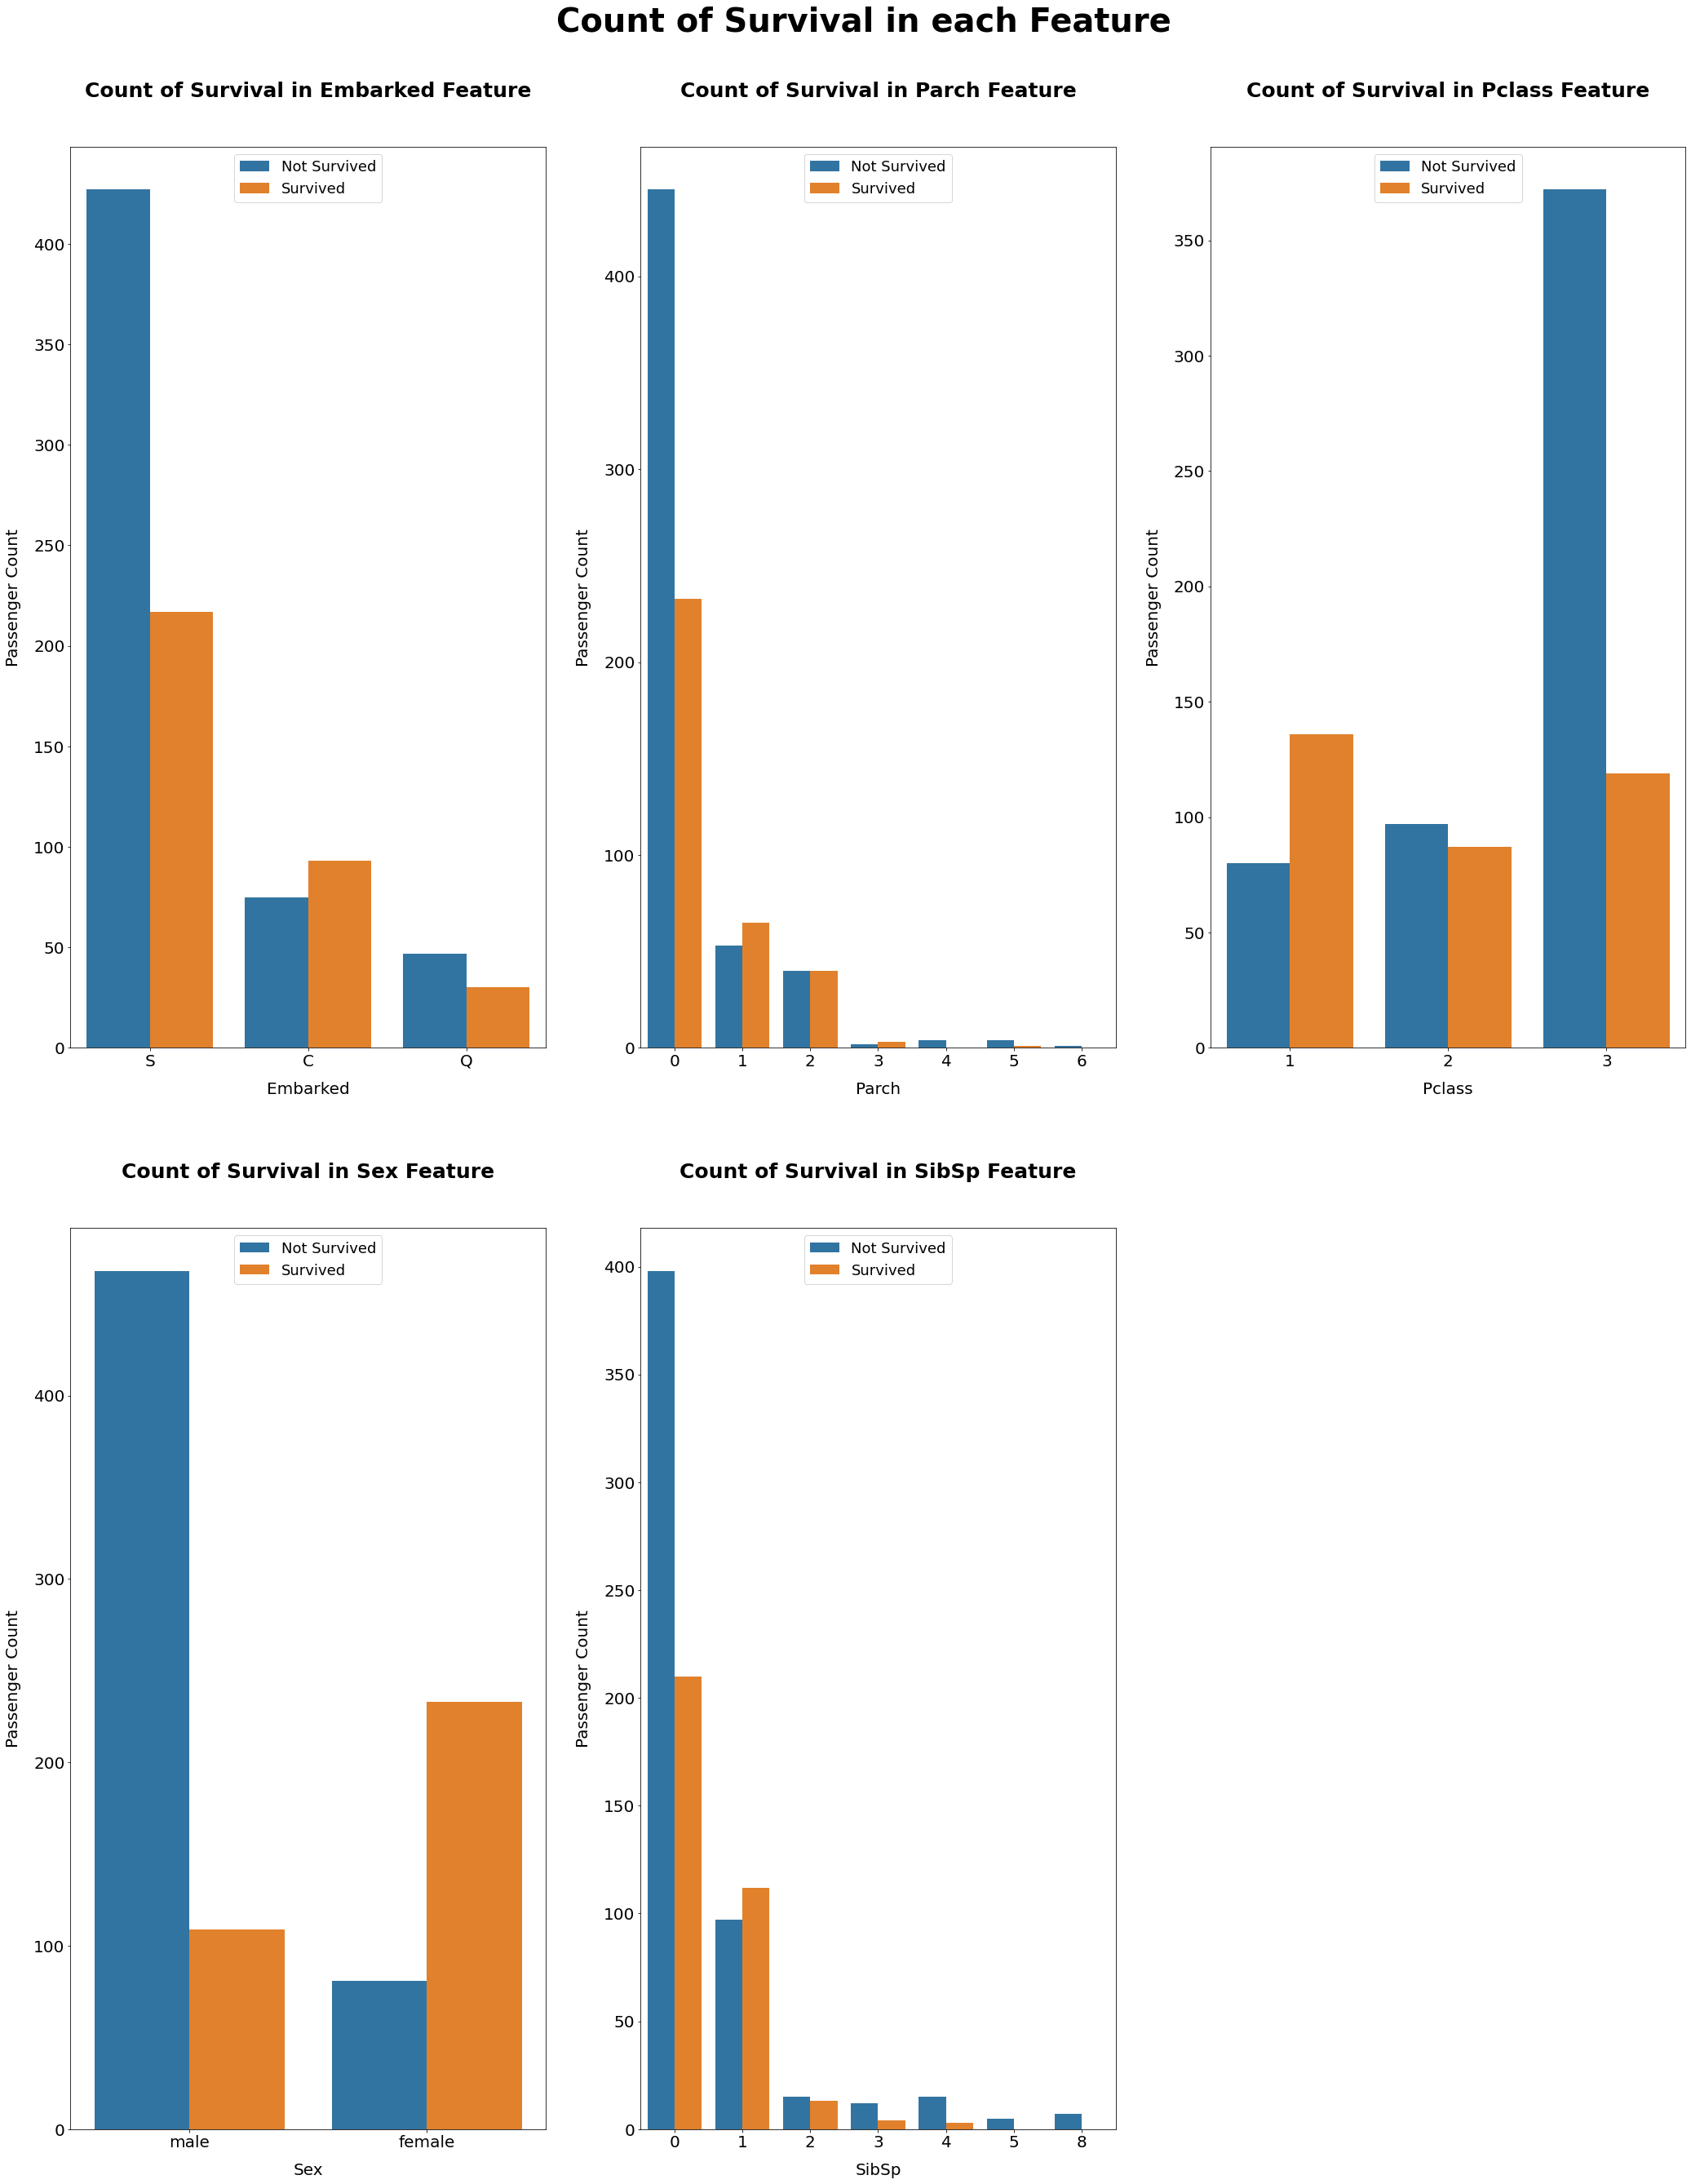

In [16]:
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']

fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(20,30))
plt.subplots_adjust(right=1.5, top=1.25)
fig.suptitle("Count of Survival in each Feature", x=0.8, y=1.33, fontsize=40, fontweight='bold')

for i, feature in enumerate(cat_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=df_train)
    plt.title('Count of Survival in {} Feature'.format(feature), size=25, y=1.05, fontweight='bold')
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    
plt.show()

* From this visualization can see that passenger from Cherbourg more survivors, while from Southampton only half can survive.
* Passeger that only bring 1 Parent/Children more survivors too.
* Passeger from first class is more survive than third class

From the previous describe function, we know that the minimum age that exists is 0.17 years and the oldest is 80 years. So I think dividing it by 13 quantile groups is sufficient.

And for Fare the cheapest is 0 and the most expensive is 512. So I think dividing it by 10 quantile groups is enough.

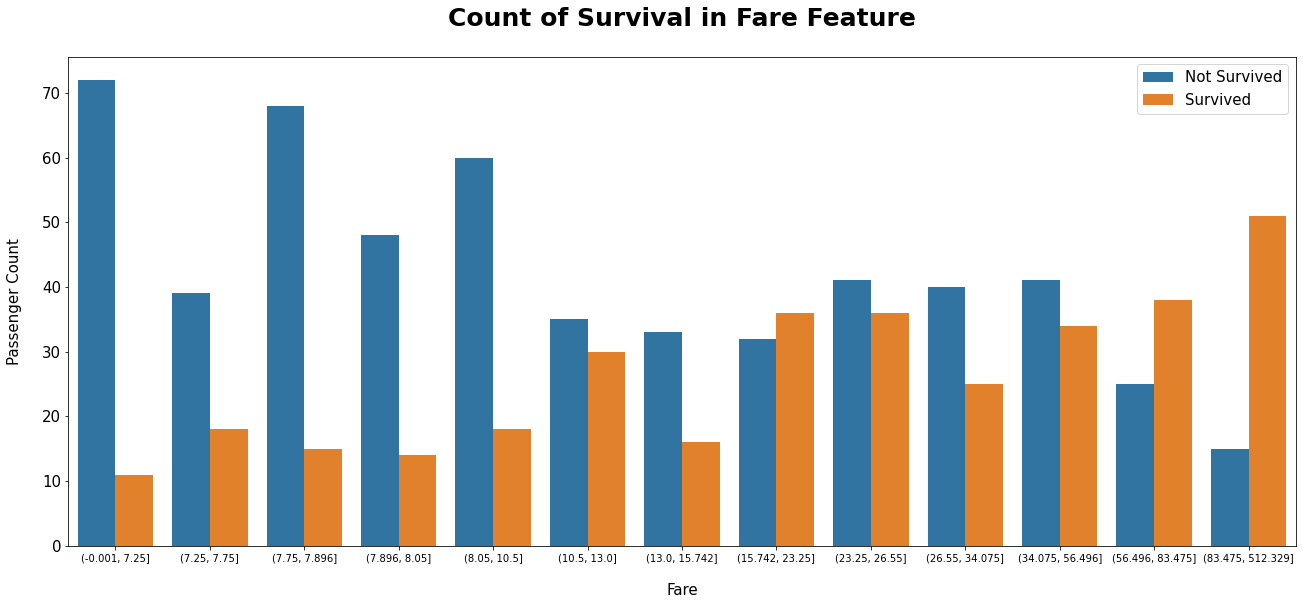

In [17]:
df_all['Fare'] = pd.qcut(df_all['Fare'], 13)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df_all)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=25, y=1.05, fontweight='bold')

plt.show()

* It can be seen that the more expensive the ticket, the more likely the person is saved, starting at 56 and up.

* But the number of survivors starting at 10.5 has increased considerably, except for events that happened to groups of ticket holders costing 13-15,742.

## Feature Engineering

Create a new column Family Size, as the name implies, a combination of Parent, Children, Sibling, and Spouse. Then add 1 assuming the person counts himself too.

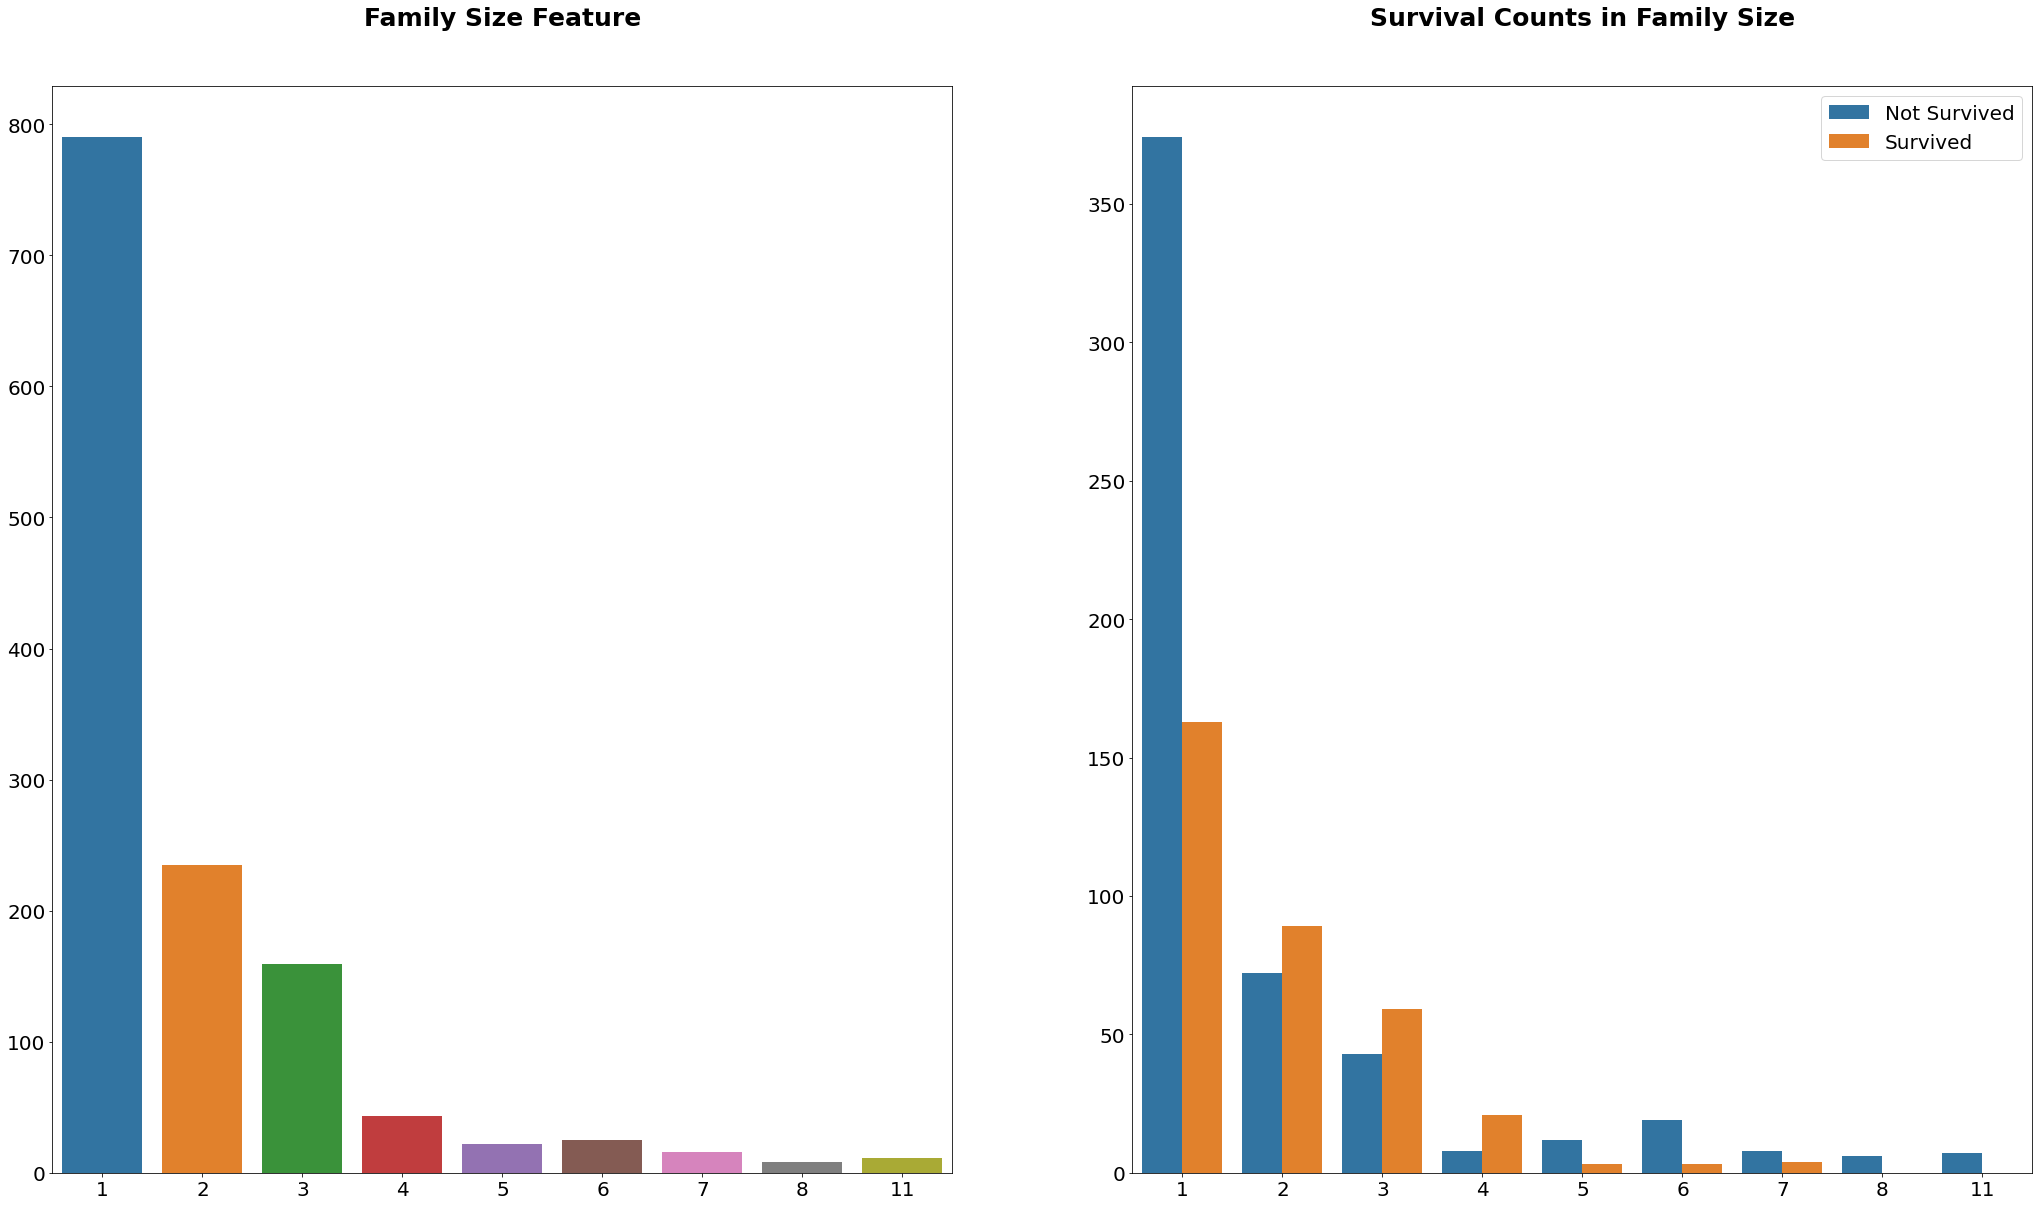

In [18]:
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,20))
plt.subplots_adjust(right=1.5)

sns.barplot(x=df_all['Family_Size'].value_counts().index, y=df_all['Family_Size'].value_counts(), ax=ax[0])
sns.countplot(x='Family_Size', hue='Survived', data=df_all, ax=ax[1])

ax[0].set_title('Family Size Feature', size=25, y=1.05, fontweight='bold')
ax[1].set_title('Survival Counts in Family Size', size=25, y=1.05, fontweight='bold')

for i in range(2):
    ax[1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    ax[i].tick_params(axis='x', labelsize=20)
    ax[i].tick_params(axis='y', labelsize=20)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')

plt.show()

* From the plot can see that passeger with 2,3, and 4 Family Size have more possibilities to survive. 

Combine Family_size with their respective groups depending on the number.

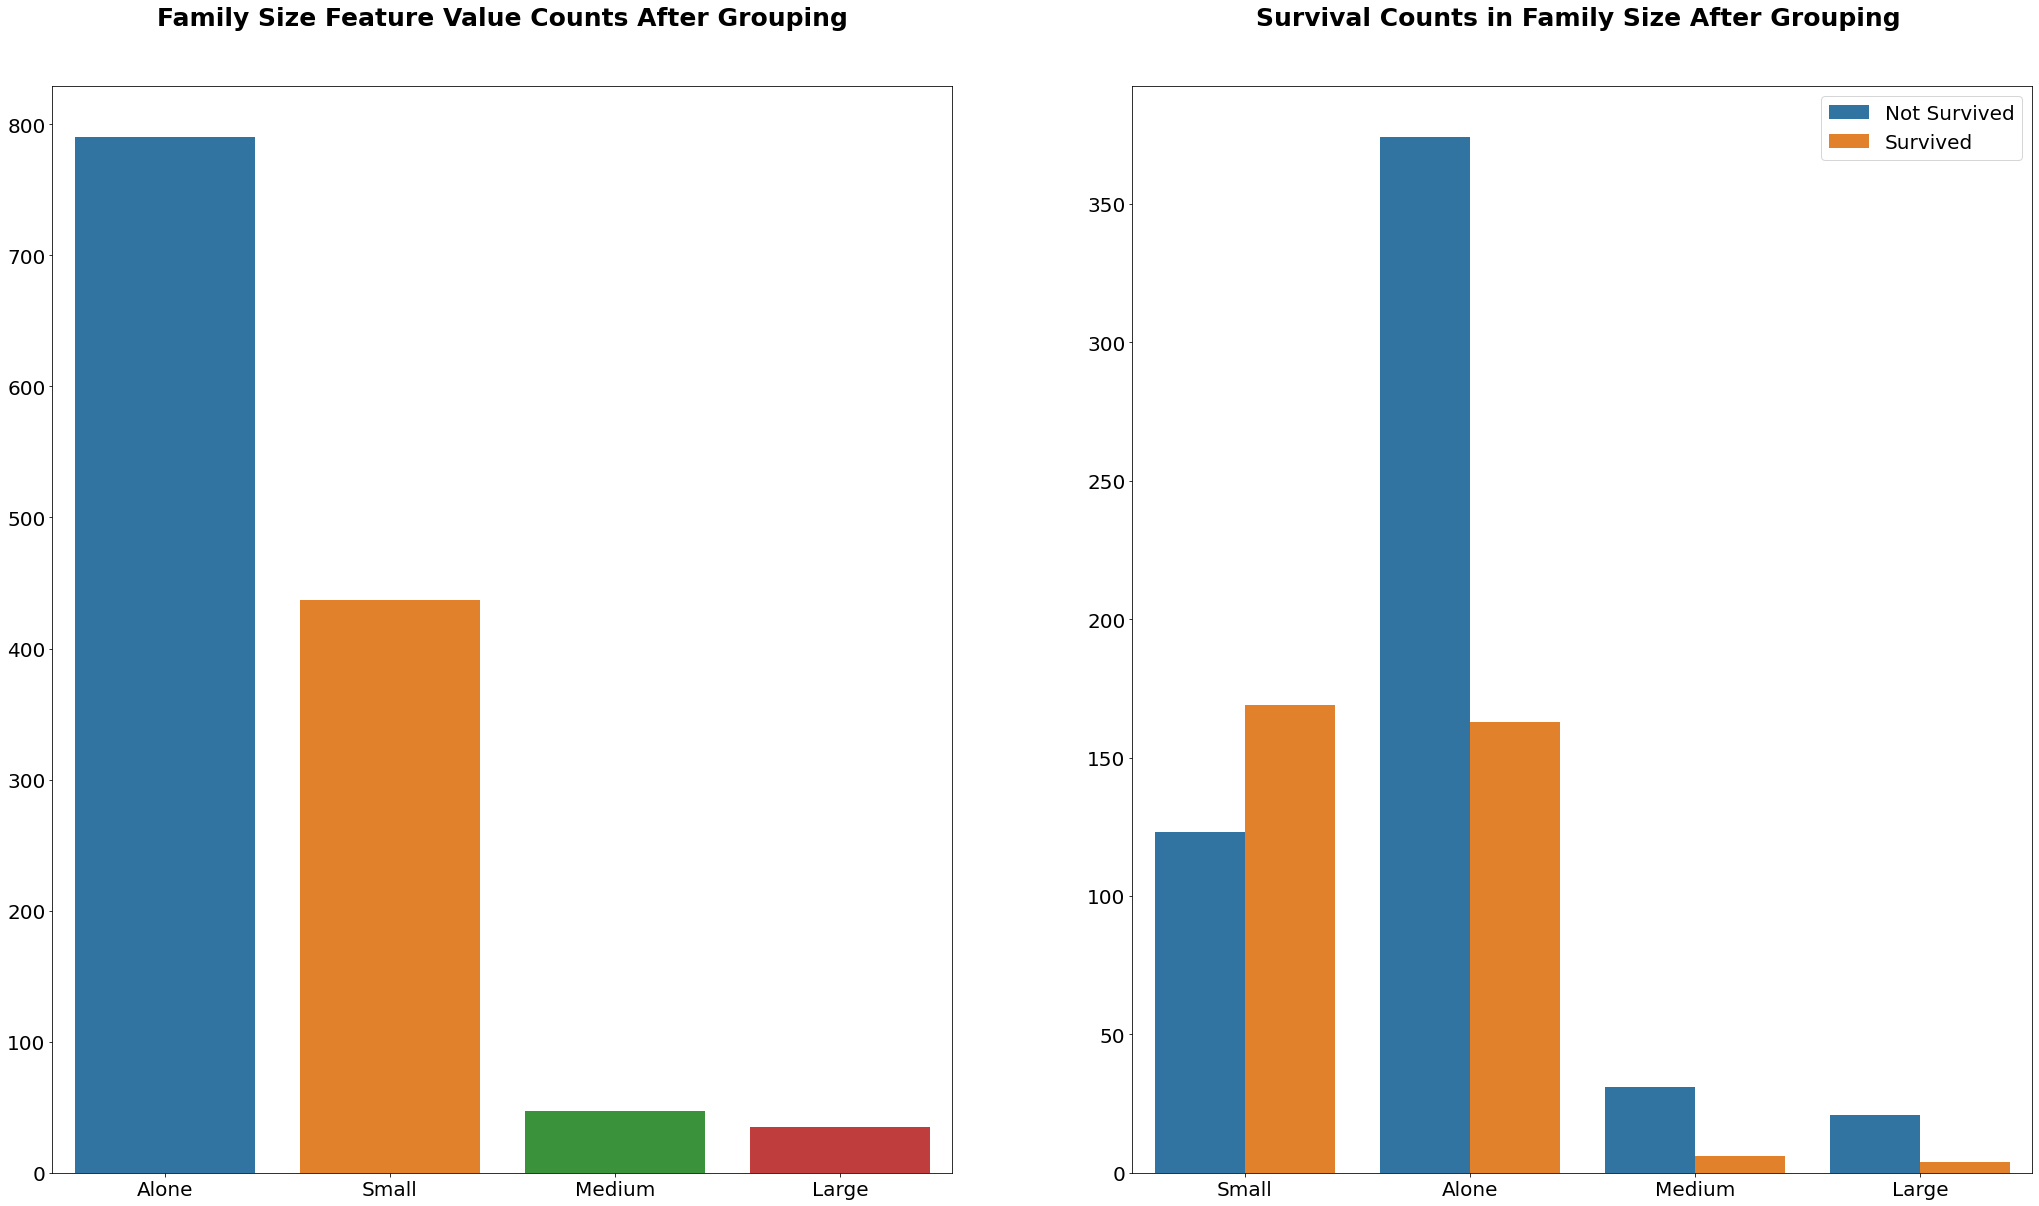

In [19]:
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
df_all['Family_Size_Grouped'] = df_all['Family_Size'].map(family_map)

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,20))
plt.subplots_adjust(right=1.5)

sns.barplot(x=df_all['Family_Size_Grouped'].value_counts().index, y=df_all['Family_Size_Grouped'].value_counts(), ax=ax[0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=df_all, ax=ax[1])

ax[0].set_title('Family Size Feature Value Counts After Grouping', size=25, y=1.05, fontweight='bold')
ax[1].set_title('Survival Counts in Family Size After Grouping ', size=25, y=1.05, fontweight='bold')

for i in range(2):
    ax[1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    ax[i].tick_params(axis='x', labelsize=20)
    ax[i].tick_params(axis='y', labelsize=20)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')

plt.show()

* Passeger that go with Small Family Size more looks have a greater level of survive.

Plotting distribution of Age who Survived

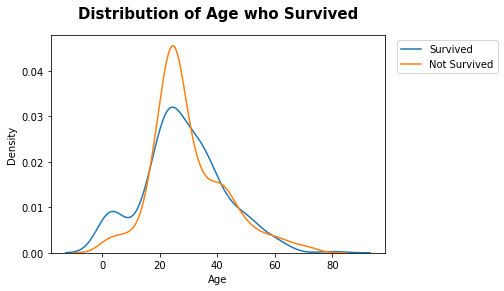

In [20]:
sns.kdeplot(df_all[df_all['Survived'] == 1]['Age'])
sns.kdeplot(df_all[df_all['Survived'] == 0]['Age'])


plt.title('Distribution of Age who Survived', size=15, y=1.05, fontweight='bold')
plt.legend(labels=['Survived', 'Not Survived'],fontsize='medium',loc=1, bbox_to_anchor=(0.75, 0.5, 0.6, 0.5))
plt.show()